In [1]:
import matplotlib.pyplot as plt
import datetime 
import scipy.integrate as integrate
from tqdm.notebook import tqdm
from HW1.one_demensional import dichotomy, golden, fib, line_search
import math

In [2]:
def make_plots(method, f, left_border, right_border, params, retry_count=1000, params_is_eps=True):
    time = []
    answers = []
    second_params = []
    for param in tqdm(params):
        mean_answer = 0.
        mean_time = 0.
        mean_second_param = 0.
        
        for _ in range(retry_count):
            start_time = datetime.datetime.now()
            answer, second_param = method(f, left_border, right_border, param)
            end_time = datetime.datetime.now()
            timedelta = end_time - start_time
            mean_time += timedelta.microseconds
            mean_answer += answer
            mean_second_param += second_param
        
        time.append(mean_time / retry_count)
        answers.append(mean_answer / retry_count)
        second_params.append(mean_second_param / retry_count)
        
    plt.figure()
    plt.title('Time to calculate')
    plt.ylabel('time, microseconds')
    if params_is_eps:
        plt.xlabel('lg(eps)')
        plt.semilogx(params, time)
    else:
        plt.xlabel('Number of calculations')
        plt.plot(params, time)
    plt.grid()
    plt.show()
    
    plt.figure()
    plt.title('Answer')
    plt.ylabel('answer')
    if params_is_eps:
        plt.xlabel('lg(eps)')
        plt.semilogx(params, answers)
    else:
        plt.xlabel('Number of calculations')
        plt.plot(params, answers)
    plt.grid()
    plt.show()
    
    plt.figure()
    plt.title('Number of calculations and eps')
    if params_is_eps:
        plt.xlabel('lg(eps)')
        plt.ylabel('Number of calculations')
        plt.semilogx(params, second_params)
    else:
        plt.xlabel('Number of calculations')
        plt.ylabel('lg(eps)')
        plt.semilogy(params, second_params)
    plt.grid()
    plt.show()

In [3]:
def f(x): # f(x) = x^2
    integral, err = integrate.quad(lambda t: 2 * t, 0, x)
    return integral

In [4]:
e_s = [10 ** x for x in range(-10, 3)]

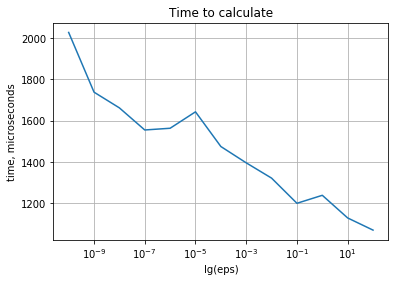

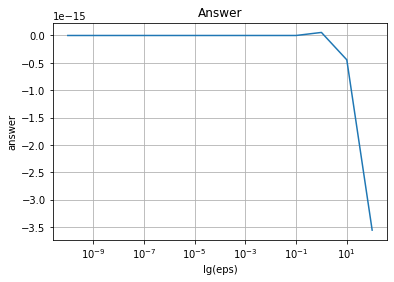

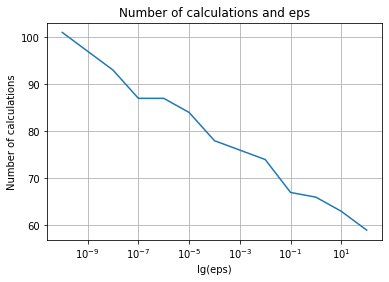

In [5]:
make_plots(dichotomy, f, -1400, 8800, e_s, params_is_eps=True)

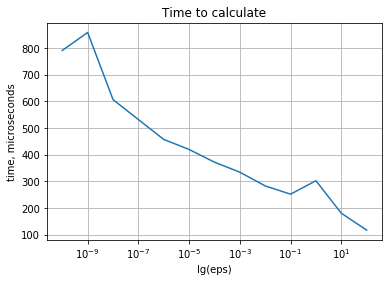

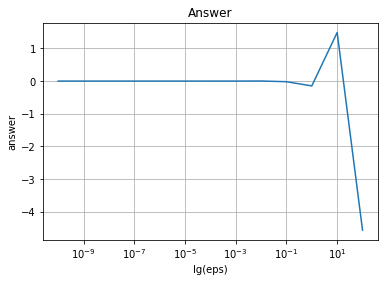

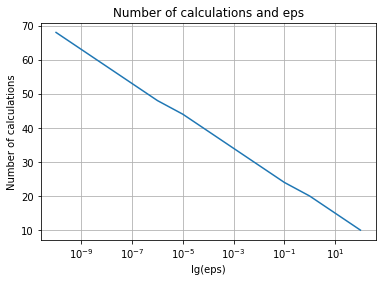

In [6]:
make_plots(golden, f, -1400, 8800, e_s, params_is_eps=True)

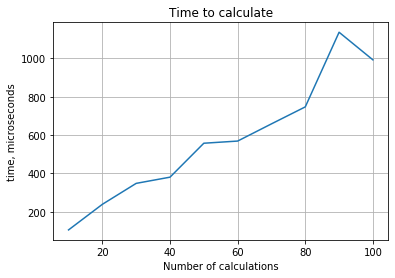

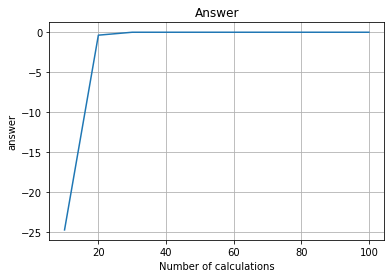

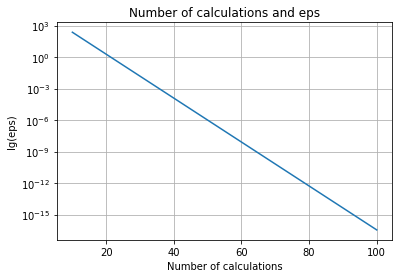

In [7]:
ns = [10 * i for i in range(1, 11)]
make_plots(fib, f, -1400, 8800, ns, params_is_eps=False)

In [8]:
line_search(f, -1400)

3842.87

In [9]:
ans, _ = golden(math.sin, -1000, 1000, 1e-5)
ans, math.sin(ans)

(130.3760927676756, -0.9999999999972239)